<a href="https://colab.research.google.com/github/basselkassem/covid19/blob/master/feature_engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install data

In [0]:
import json
access_token = {"username":"","key":""}
with open('/content/kaggle.json', 'w') as file:
    json.dump(access_token, file)
!pip install -q kaggle
!mkdir -p ~/.kaggle 
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json
!kaggle competitions download -c covid19-global-forecasting-week-3

submission.csv: Skipping, found more recently modified local copy (use --force to force download)
train.csv: Skipping, found more recently modified local copy (use --force to force download)
test.csv: Skipping, found more recently modified local copy (use --force to force download)


# Import Libs

In [0]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
mpl.rcParams['axes.grid']=True
pd.options.display.max_rows = 999

In [0]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('submission.csv')

train.Date = pd.to_datetime(train.Date)
test.Date = pd.to_datetime(test.Date)

# Merge train set with test set

In [0]:
test_start_date = test.Date.min()
test_end_date = test.Date.max()
print('test start date:', test_start_date)
print('test enc date:', test_end_date)

train_start_date = train.Date.min()
train_end_date = train.Date.max()
print('train start date:', train_start_date)
print('train end date:', train_end_date)

print('test and train overlap:', train_end_date - test_start_date)

test start date: 2020-03-26 00:00:00
test enc date: 2020-05-07 00:00:00
train start date: 2020-01-22 00:00:00
train end date: 2020-04-07 00:00:00
test and train overlap: 12 days 00:00:00


deleted overlapped recored from the train set

In [0]:
train_re = train[train.Date < test_start_date]

test_start_date = test.Date.min()
test_end_date = test.Date.max()
print('test start date:', test_start_date)
print('test end date:', test_end_date)

train_start_date = train_re.Date.min()
train_end_date = train_re.Date.max()
print('train start date:', train_start_date)
print('train end date:', train_end_date)

print('test and train overlap:', train_end_date - test_start_date)

test start date: 2020-03-26 00:00:00
test end date: 2020-05-07 00:00:00
train start date: 2020-01-22 00:00:00
train end date: 2020-03-25 00:00:00
test and train overlap: -1 days +00:00:00


In [0]:
print(test.columns)
print(train_re.columns)

Index(['ForecastId', 'Province_State', 'Country_Region', 'Date'], dtype='object')
Index(['Id', 'Province_State', 'Country_Region', 'Date', 'ConfirmedCases',
       'Fatalities'],
      dtype='object')


In [0]:
test_re = test.drop(columns='ForecastId')
test_re['ConfirmedCases'] = None
test_re['Fatalities'] = None
train_re = train_re.drop(columns = 'Id')

In [0]:
print(test_re.columns)
print(train_re.columns)


Index(['Province_State', 'Country_Region', 'Date', 'ConfirmedCases',
       'Fatalities'],
      dtype='object')
Index(['Province_State', 'Country_Region', 'Date', 'ConfirmedCases',
       'Fatalities'],
      dtype='object')


In [0]:
data = train_re.append(test_re)
data = data.reset_index(drop = True)
data.head()

,Province_State,Country_Region,Date,ConfirmedCases,Fatalities
0,NaN,Afghanistan,2020-01-22,0,0
1,NaN,Afghanistan,2020-01-23,0,0
2,NaN,Afghanistan,2020-01-24,0,0
3,NaN,Afghanistan,2020-01-25,0,0
4,NaN,Afghanistan,2020-01-26,0,0


In [0]:
data[data['Country_Region'] == 'Afghanistan']

,Province_State,Country_Region,Date,ConfirmedCases,Fatalities
0,NaN,Afghanistan,2020-01-22,0,0
1,NaN,Afghanistan,2020-01-23,0,0
2,NaN,Afghanistan,2020-01-24,0,0
3,NaN,Afghanistan,2020-01-25,0,0
4,NaN,Afghanistan,2020-01-26,0,0
5,NaN,Afghanistan,2020-01-27,0,0
6,NaN,Afghanistan,2020-01-28,0,0
7,NaN,Afghanistan,2020-01-29,0,0
8,NaN,Afghanistan,2020-01-30,0,0
9,NaN,Afghanistan,2020-01-31,0,0


# Split data into tow sets: one to pridect fatalities and one to pridect confirmed cases

In [0]:
data_cc = data.drop(columns = 'Fatalities')
data_fa = data.drop(columns = 'ConfirmedCases')

In [0]:
data_cc.head()

,Province_State,Country_Region,Date,ConfirmedCases
0,NaN,Afghanistan,2020-01-22,0
1,NaN,Afghanistan,2020-01-23,0
2,NaN,Afghanistan,2020-01-24,0
3,NaN,Afghanistan,2020-01-25,0
4,NaN,Afghanistan,2020-01-26,0


# Lag features

In [0]:
from statsmodels.tsa.stattools import acf
time_shift = 14

In [0]:
data_cc_acf = np.zeros((data.shape[0], time_shift + 1))
data_cc_gb = data_cc.groupby(by = ['Country_Region', 'Date']).sum()
data_cc_gb = data_cc_gb.reset_index()
for i, country in enumerate(data_cc_gb.Country_Region.unique()):
    record = data_cc_gb[data_cc_gb['Country_Region'] == country]['ConfirmedCases'].values
    acf_12 = acf(record, nlags = time_shift, fft = True)
    if not np.isnan(acf_12).any():
      data_cc_acf[i, :] = acf_12
    else:
       print(country, acf_12)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:546: RuntimeWarning: invalid value encountered in true_divide
  acf = avf[:nlags + 1] / avf[0]


Botswana [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
Burma [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
Burundi [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
Kosovo [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
MS Zaandam [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
Sierra Leone [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]


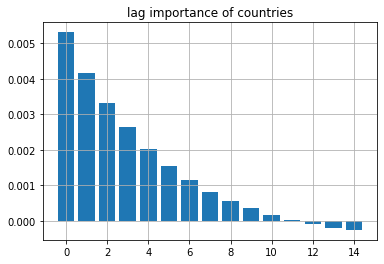

In [0]:
avgs = np.mean(data_cc_acf, axis = 0)
plt.bar(x = np.arange(time_shift + 1), height = avgs)
plt.title('lag importance of countries')
plt.show()

In [0]:
lags = [i + 1 for i in range(7)]
lags_length = len(lags)
delta_lags_gap = np.timedelta64(lags_length, 'D')
index_cols = ['Province_State','Country_Region', 'Date']
print(lags, delta_lags_gap)

[1, 2, 3, 4, 5, 6, 7] 7 days


In [0]:
def lag_features(grid, features, lags):
  df = grid.copy()
  for time_shift in lags:
    df_shift = df[index_cols + features].copy()
    delta_gap = np.timedelta64(time_shift,'D')
    df_shift['Date'] = df_shift['Date'] + delta_gap
    lag_cols = lambda x: '{}_lag_{}'.format(x, time_shift) if x in features else x
    df_shift = df_shift.rename(columns = lag_cols)
    df = pd.merge(df, df_shift, on = index_cols, how = 'left')
  return df

In [0]:
print(train.Date.min())
print(data_cc.Date.min())

2020-01-22 00:00:00
2020-01-22 00:00:00


In [0]:
grid = lag_features(data_cc, ['ConfirmedCases'], lags)

In [0]:
grid.isna().sum()

Province_State          18832
Country_Region              0
Date                        0
ConfirmedCases          13158
ConfirmedCases_lag_1    13158
ConfirmedCases_lag_2    13158
ConfirmedCases_lag_3    13158
ConfirmedCases_lag_4    13158
ConfirmedCases_lag_5    13158
ConfirmedCases_lag_6    13158
ConfirmedCases_lag_7    13158
dtype: int64

In [0]:
grid = grid[grid.Date > grid.Date.min() + delta_lags_gap]
grid.isna().sum()

Province_State          17424
Country_Region              0
Date                        0
ConfirmedCases          13158
ConfirmedCases_lag_1    12852
ConfirmedCases_lag_2    12546
ConfirmedCases_lag_3    12240
ConfirmedCases_lag_4    11934
ConfirmedCases_lag_5    11628
ConfirmedCases_lag_6    11322
ConfirmedCases_lag_7    11016
dtype: int64

There is a lot of missing data. The reason is:

the task is to pridect Fatalities and confirmed cases from  2020-03-26 until 2020-05-07, but we have data until 2020-03-25.
We need more data inorder to treat the task as a timeseries.

The above features works in case we want to pridect 7 days in the feature.



# Time features

In [0]:
def extract_time_features(df):
  df['Day'] = df['Date'].dt.day
  df['Month'] = df['Date'].dt.month
  df['Day_of_Week'] = df['Date'].dt.dayofweek
  df['Day_of_Year'] = df['Date'].dt.dayofyear
  df['Week_of_Year'] = df['Date'].dt.weekofyear
  df['Quarter'] = df['Date'].dt.quarter
  df['Days_im_Month'] = df['Date'].dt.days_in_month

extract_time_features(train)
extract_time_features(test)

,ForecastId,Province_State,Country_Region,Date,Day,Month,Day_of_Week,Day_of_Year,Week_of_Year,Quarter,Days_im_Month
0,1,NaN,Afghanistan,2020-03-26,26,3,3,86,13,1,31
1,2,NaN,Afghanistan,2020-03-27,27,3,4,87,13,1,31
2,3,NaN,Afghanistan,2020-03-28,28,3,5,88,13,1,31
3,4,NaN,Afghanistan,2020-03-29,29,3,6,89,13,1,31
4,5,NaN,Afghanistan,2020-03-30,30,3,0,90,14,1,31


# Statistical features

In [0]:
def fill_province(row):
  if pd.isna(row['Province_State']):
    row['Province_State'] = row['Country_Region'] + '_state'
  return row

train = train.apply(fill_province, axis = 1)
test = test.apply(fill_province, axis = 1)

## Target per country

In [0]:
def percentile(n):
    def percentile_(x):
        return np.percentile(x, n)
    percentile_.__name__ = 'percentile_%s' % n
    return percentile_

def creat_stat_features(df, targets, columns):
  agg_array = [np.sum, np.mean, np.std, np.median, np.var, np.max, percentile(50), percentile(95)]
  cols = targets + columns
  ndf = df[cols].groupby(by = columns).agg(agg_array)
  ndf.columns = [col[0] + '_'+ '_'.join(columns) + '_' + col[1] for col in ndf.columns]
  ndf = ndf.reset_index()
  return ndf                   

In [0]:
df = creat_stat_features(train, ['ConfirmedCases', 'Fatalities'], ['Country_Region'] )    
train = train.merge(df, on = 'Country_Region', how = 'left')
test = test.merge(df, on = 'Country_Region', how = 'left')

## Target per country/province

In [0]:
df = creat_stat_features(train, ['ConfirmedCases', 'Fatalities'], ['Country_Region', 'Province_State'] )    
train = train.merge(df, on = ['Country_Region', 'Province_State'], how = 'left')
test = test.merge(df, on = ['Country_Region', 'Province_State'], how = 'left')

In [0]:
train.head(50)

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities,Day,Month,Day_of_Week,Day_of_Year,Week_of_Year,Quarter,Days_im_Month,ConfirmedCases_Country_Region_sum,ConfirmedCases_Country_Region_mean,ConfirmedCases_Country_Region_std,ConfirmedCases_Country_Region_median,ConfirmedCases_Country_Region_var,ConfirmedCases_Country_Region_amax,ConfirmedCases_Country_Region_percentile_50,ConfirmedCases_Country_Region_percentile_95,Fatalities_Country_Region_sum,Fatalities_Country_Region_mean,Fatalities_Country_Region_std,Fatalities_Country_Region_median,Fatalities_Country_Region_var,Fatalities_Country_Region_amax,Fatalities_Country_Region_percentile_50,Fatalities_Country_Region_percentile_95,ConfirmedCases_Country_Region_Province_State_sum,ConfirmedCases_Country_Region_Province_State_mean,ConfirmedCases_Country_Region_Province_State_std,ConfirmedCases_Country_Region_Province_State_median,ConfirmedCases_Country_Region_Province_State_var,ConfirmedCases_Country_Region_Province_State_amax,ConfirmedCases_Country_Region_Province_State_percentile_50,ConfirmedCases_Country_Region_Province_State_percentile_95,Fatalities_Country_Region_Province_State_sum,Fatalities_Country_Region_Province_State_mean,Fatalities_Country_Region_Province_State_std,Fatalities_Country_Region_Province_State_median,Fatalities_Country_Region_Province_State_var,Fatalities_Country_Region_Province_State_amax,Fatalities_Country_Region_Province_State_percentile_50,Fatalities_Country_Region_Province_State_percentile_95
0,1,Afghanistan_state,Afghanistan,2020-01-22,0.0,0.0,22,1,2,22,4,1,31,3454.0,44.857143,96.349516,1.0,9283.229323,423.0,1.0,284.6,84.0,1.090909,2.601527,0.0,6.767943,14.0,0.0,6.2,3454.0,44.857143,96.349516,1.0,9283.229323,423.0,1.0,284.6,84.0,1.090909,2.601527,0.0,6.767943,14.0,0.0,6.2
1,2,Afghanistan_state,Afghanistan,2020-01-23,0.0,0.0,23,1,3,23,4,1,31,3454.0,44.857143,96.349516,1.0,9283.229323,423.0,1.0,284.6,84.0,1.090909,2.601527,0.0,6.767943,14.0,0.0,6.2,3454.0,44.857143,96.349516,1.0,9283.229323,423.0,1.0,284.6,84.0,1.090909,2.601527,0.0,6.767943,14.0,0.0,6.2
2,3,Afghanistan_state,Afghanistan,2020-01-24,0.0,0.0,24,1,4,24,4,1,31,3454.0,44.857143,96.349516,1.0,9283.229323,423.0,1.0,284.6,84.0,1.090909,2.601527,0.0,6.767943,14.0,0.0,6.2,3454.0,44.857143,96.349516,1.0,9283.229323,423.0,1.0,284.6,84.0,1.090909,2.601527,0.0,6.767943,14.0,0.0,6.2
3,4,Afghanistan_state,Afghanistan,2020-01-25,0.0,0.0,25,1,5,25,4,1,31,3454.0,44.857143,96.349516,1.0,9283.229323,423.0,1.0,284.6,84.0,1.090909,2.601527,0.0,6.767943,14.0,0.0,6.2,3454.0,44.857143,96.349516,1.0,9283.229323,423.0,1.0,284.6,84.0,1.090909,2.601527,0.0,6.767943,14.0,0.0,6.2
4,5,Afghanistan_state,Afghanistan,2020-01-26,0.0,0.0,26,1,6,26,4,1,31,3454.0,44.857143,96.349516,1.0,9283.229323,423.0,1.0,284.6,84.0,1.090909,2.601527,0.0,6.767943,14.0,0.0,6.2,3454.0,44.857143,96.349516,1.0,9283.229323,423.0,1.0,284.6,84.0,1.090909,2.601527,0.0,6.767943,14.0,0.0,6.2
5,6,Afghanistan_state,Afghanistan,2020-01-27,0.0,0.0,27,1,0,27,5,1,31,3454.0,44.857143,96.349516,1.0,9283.229323,423.0,1.0,284.6,84.0,1.090909,2.601527,0.0,6.767943,14.0,0.0,6.2,3454.0,44.857143,96.349516,1.0,9283.229323,423.0,1.0,284.6,84.0,1.090909,2.601527,0.0,6.767943,14.0,0.0,6.2
6,7,Afghanistan_state,Afghanistan,2020-01-28,0.0,0.0,28,1,1,28,5,1,31,3454.0,44.857143,96.349516,1.0,9283.229323,423.0,1.0,284.6,84.0,1.090909,2.601527,0.0,6.767943,14.0,0.0,6.2,3454.0,44.857143,96.349516,1.0,9283.229323,423.0,1.0,284.6,84.0,1.090909,2.601527,0.0,6.767943,14.0,0.0,6.2
7,8,Afghanistan_state,Afghanistan,2020-01-29,0.0,0.0,29,1,2,29,5,1,31,3454.0,44.857143,96.349516,1.0,9283.229323,423.0,1.0,284.6,84.0,1.090909,2.601527,0.0,6.767943,14.0,0.0,6.2,3454.0,44.857143,96.349516,1.0,9283.229323,423.0,1.0,284.6,84.0,1.090909,2.601527,0.0,6.767943,14.0,0.0,6.2
8,9,Afghanistan_state,Afghanistan,2020-01-30,0.0,0.0,30,1,3,30,5,1,31,3454.0,44.857143,96.349516,1.0,9283.229323,423.0,1.0,284.6,84.0,1.090909,2.601527,0.0,6.767943,14.0,0.0,6.2,3454.0,44.857143,96.349516,1.0,9283.